<a href="https://colab.research.google.com/github/chrpkorir/Cats-vs-Dogs/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Image Classification of Cats and Dogs






* Import the necessary modeles



In [1]:
# Import necessary module

# General modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import development libraries

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

# loading in oyr data
import os
from zipfile import ZipFile


* Get our Data

In [2]:
# We get the data

!wget --no-check-certificate\
       https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip&sa=D&ust=1607243579741000&usg=AFQjCNEGEPCUbPEI_kRt_-FzehIEd43huA

--2020-12-07 08:53:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   165MB/s    in 0.4s    

2020-12-07 08:53:31 (165 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# unzip the data

zip = ZipFile('/content/cats_and_dogs_filtered.zip', 'r')
zip.extractall()

In [4]:
# Get the various directories
train_dir ='/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

train_cats_dir ='/content/cats_and_dogs_filtered/train/cats'
train_dogs_dir = '/content/cats_and_dogs_filtered/train/dogs'

validation_cats_dir ='/content/cats_and_dogs_filtered/validation/cats'
validation_dogs_dir = '/content/cats_and_dogs_filtered/validation/dogs'



In [5]:
# view the size of train and validation data
train_cats = os.listdir(train_cats_dir)

len(train_cats)

1000

Load data through the Image data Generator

In [6]:
# mport Image data Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Instantiate the generator

#Train
train_datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range= 0.5,
                                   height_shift_range= 0.5,
                                   zoom_range= 0.8,
                                   horizontal_flip= True,
                                   vertical_flip= True,
                                   rescale = 1/255)

# Validation
validation_datagen = ImageDataGenerator(rescale=1/255)


Flow from data

In [8]:
# Flow from data

train_flow = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               class_mode='binary',
                                               batch_size=50,
                                               shuffle=True)


Found 2000 images belonging to 2 classes.


In [9]:
# Test data
validation_flow = validation_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         class_mode='binary',
                                                         batch_size=50)

Found 1000 images belonging to 2 classes.


Model Development

In [10]:
# call the model

model = Sequential([
                    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                     Conv2D(128, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                     Conv2D(128, (3,3), activation='relu'),
                    MaxPool2D((2,2)),

                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
# Fit our data

model_history= model.fit(train_flow,
                         epochs = 50,
                         steps_per_epoch= 40 , # steps = Total data/ batch size
                         validation_data = validation_flow,
                         validation_steps = 20)

Epoch 1/50
40/40 [==============================] - 16s 395ms/step - loss: 0.6978 - accuracy: 0.5250 - val_loss: 0.6872 - val_accuracy: 0.5090
Epoch 2/50
40/40 [==============================] - 16s 397ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
40/40 [==============================] - 16s 399ms/step - loss: 0.6936 - accuracy: 0.4890 - val_loss: 0.6924 - val_accuracy: 0.5340
Epoch 4/50
40/40 [==============================] - 16s 399ms/step - loss: 0.6918 - accuracy: 0.5160 - val_loss: 0.6795 - val_accuracy: 0.5940
Epoch 5/50
40/40 [==============================] - 16s 395ms/step - loss: 0.6845 - accuracy: 0.5400 - val_loss: 0.6915 - val_accuracy: 0.5110
Epoch 6/50
40/40 [==============================] - 16s 398ms/step - loss: 0.6836 - accuracy: 0.5360 - val_loss: 0.6580 - val_accuracy: 0.5940
Epoch 7/50
40/40 [==============================] - 16s 395ms/step - loss: 0.6801 - accuracy: 0.5500 - val_loss: 0.6880 - val_accuracy: 0.5400

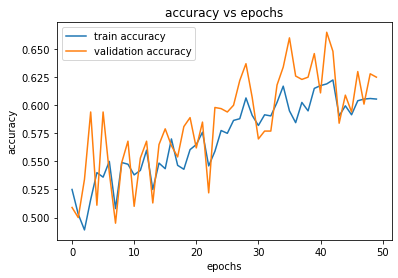

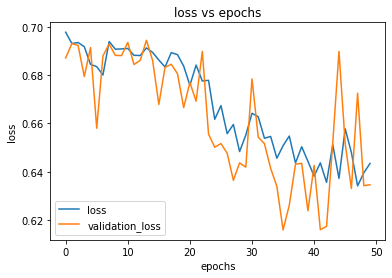

In [15]:
def plot_figure(model_history):
  acc = model_history.history['accuracy']
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']
  val_accuracy = model_history.history['val_accuracy']
  
  epochs = range(len(acc))

  plt.plot(epochs, acc, label='train accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('accuracy vs epochs')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('loss vs epochs')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  # plot figures
plot_figure(model_history)

  

